In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('AirPassengers.csv')
df.index = pd.to_datetime(df.Month, format='%Y-%m')
df.drop('Month', axis=1, inplace=True)


In [27]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**ADF (Augmented Dickey Fuller) Test**


The Dickey Fuller test is one of the most popular statistical tests. It can 
be used to determine if the series is stationary or not.
- Null Hypothesis: The series is non-stationary
- Alternate Hypothesis: The series is stationary.

In [28]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df)
print('number of observations', adftest[3], '\np-value:', adftest[1])

number of observations 130 
p-value: 0.9918802434376411


In this test, the p-value is much larger than 0.05, therefore we cannot 
reject the null hypothesis. The time series is non-stationary

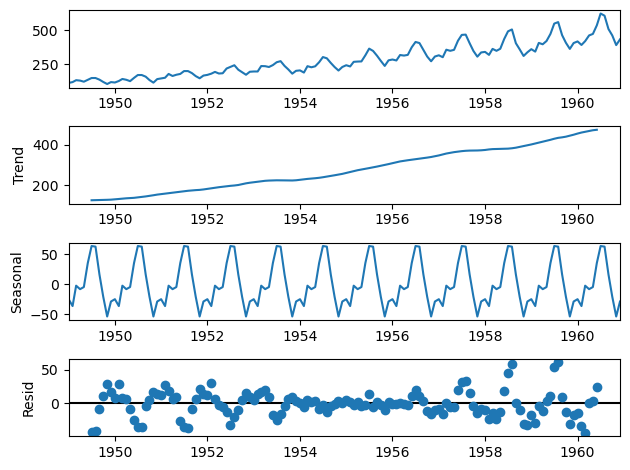

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive')
result.plot()
plt.show()

**Holt-Winters Exponential Smoothing in Python**

In [30]:
from statsmodels.tsa.holtwinters import Holt
model1 = Holt(df).fit(smoothing_level=0.3)
model2 = Holt(df).fit(smoothing_level=0.5)
pred1 = model1.forecast(steps=15)
pred2 = model2.forecast(steps=15)


c:\Users\3mm3t\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\3mm3t\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


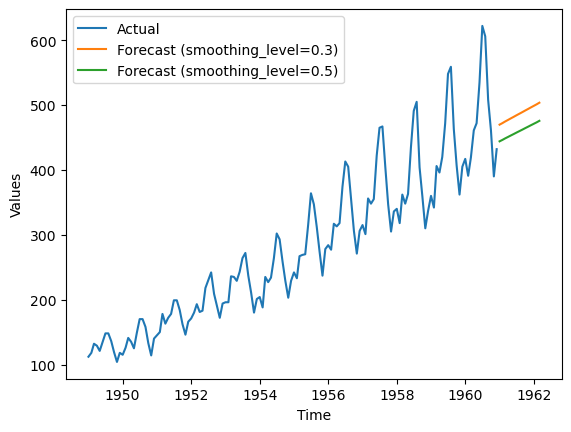

In [31]:
plt.plot(df.index, df.values, label='Actual')
plt.plot(pred1.index, pred1.values, label='Forecast (smoothing_level=0.3)')
plt.plot(pred2.index, pred2.values, label='Forecast (smoothing_level=0.5)')

plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


**Holt-Winter’s Seasonal Smoothing model**

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df, trend="add",
seasonal="add",
seasonal_periods=12).fit()
pred1 = model.forecast(12)

c:\Users\3mm3t\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


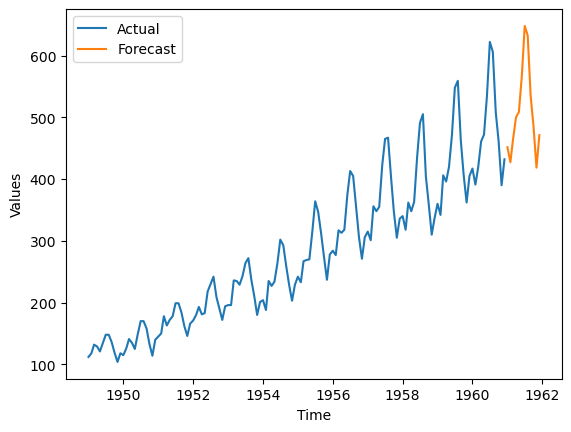

In [33]:
import matplotlib.pyplot as plt

plt.plot(df.index, df.values, label='Actual')
plt.plot(pred1.index, pred1.values, label='Forecast')

plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

# Display the plot
plt.show()


**Measuring ACF and PACF in Python**

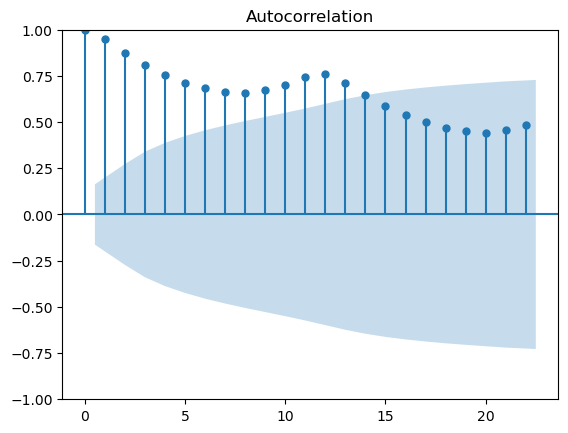

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)
plt.show()


c:\Users\3mm3t\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


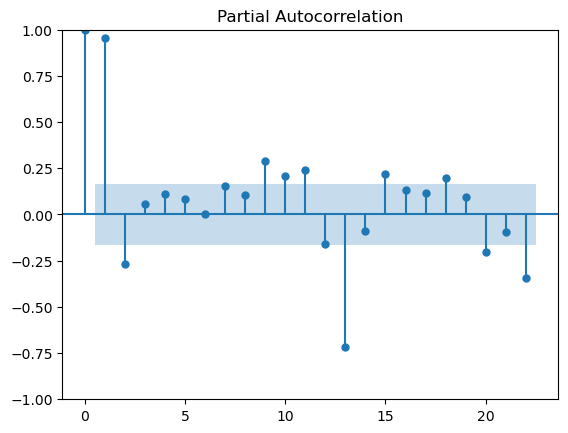

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df)
plt.show()


**Build ARIMA Model**

In [36]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df, order=(2,1,1)).fit()
arima_model.summary()

c:\Users\3mm3t\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -685.169
Date:                Mon, 26 Jun 2023   AIC                           1378.338
Time:                        12:47:42   BIC                           1390.190
Sample:                    01-01-1949   HQIC                          1383.154
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0907      0.083     13.190      0.000       0.929       1.253
ar.L2         -0.4890      0.097     -5.046      0.000      -0.679      -0.299
ma.L1         -0.8439      0.073    -11.486      0.000      -0.988      -0.700
sigma2       844.6059    103.095      8.192      0.000     642.543    1046.669
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 2.15
Prob(Q):                              0.33   Prob(JB):                         0.34
Heteroskedasticity (H):               7.67   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Seasonal ARIMA Model**

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
arima_model = SARIMAX(df, order=(2,1,0),
seasonal_order=(1,1,0,12)).fit()
arima_model.summary()

c:\Users\3mm3t\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -507.186
Date:                            Mon, 26 Jun 2023   AIC                           1022.373
Time:                                    12:47:43   BIC                           1033.874
Sample:                                01-01-1949   HQIC                          1027.046
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3002      0.082     -3.639      0.000      -0.462      -0.139
ar.L2         -0.0126      0.111     -0.113      0.910      -0.230       0.205
ar.S.L12      -0.1409      0.092     -1.530      0.126      -0.321       0.040
sigma2       134.6782     15.307      8.798      0.000     104.677     164.680
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.34
Prob(Q):                              0.97   Prob(JB):                         0.02
Heteroskedasticity (H):               2.64   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Auto-ARIMA Model**

In [24]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(df, seasonal=True, m=12)
arima_model.summary()

ModuleNotFoundError: No module named 'pmdarima'